# 기계학습과 인공신경망 10장: RNN 실습

본 내용은 아래 참고 링크에서 가져온 것이며 더 자세한 설명은 아래 링크에서 확인 가능.

참고 링크: https://datascienceschool.net/view-notebook/1d93b9dc6c624fbaa6af2ce9290e2479/


In [20]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz


# 0. 사용할 데이터 생성

(1) 실험 파라미터 설정 및 sequence 데이터 생성

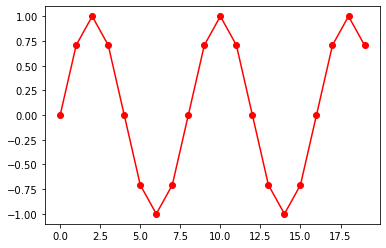

In [21]:
## Some (hyper) parameters
FREQ = 0.125
N_samples = 20
N_timesteps = 3

s = np.sin(2 * np.pi * FREQ * np.arange(N_samples)) 
## Add some noise
# s += 0.1*np.random.randn(N_samples)
plt.plot(s, 'ro-')
plt.show()

(2) Sequence를 다루려면 Toeplitz 행렬형으로 바꿔야 ...

In [22]:
c = np.r_[s[-1], np.zeros(s.shape[0] - 2)]
r = s[::-1]
S = np.fliplr(toeplitz(c, r))

In [23]:
S

array([[ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00,
         7.07106781e-01,  1.22464680e-16, -7.07106781e-01,
        -1.00000000e+00, -7.07106781e-01, -2.44929360e-16,
         7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
         3.67394040e-16, -7.07106781e-01, -1.00000000e+00,
        -7.07106781e-01, -4.89858720e-16,  7.07106781e-01,
         1.00000000e+00,  7.07106781e-01],
       [ 7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
         1.22464680e-16, -7.07106781e-01, -1.00000000e+00,
        -7.07106781e-01, -2.44929360e-16,  7.07106781e-01,
         1.00000000e+00,  7.07106781e-01,  3.67394040e-16,
        -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
        -4.89858720e-16,  7.07106781e-01,  1.00000000e+00,
         7.07106781e-01,  0.00000000e+00],
       [ 1.00000000e+00,  7.07106781e-01,  1.22464680e-16,
        -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
        -2.44929360e-16,  7.07106781e-01,  1.00000000e+00,
         7.07106781e-01,  3.6

# 1. Sequence prediction - (Seq-to-point)

(1) 학습 데이터와 목표값 설정

In [24]:
X_train = S[:-1, :N_timesteps][:, :, np.newaxis]
Y_train = S[:-1, N_timesteps]

In [25]:
X_train.shape, Y_train.shape

((18, 3, 1), (18,))

(2) 학습 데이터와 목표 값 확인

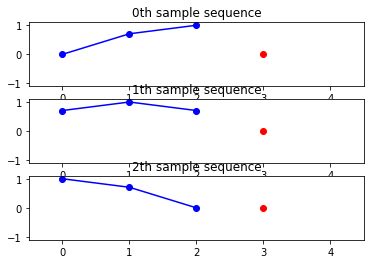

In [26]:
Nplt = 3
for i in range(Nplt):
    plt.subplot(Nplt,1,i+1)
    plt.plot([0, 1, 2], X_train[i].flatten(), 'bo-', label="input sequence")
    plt.plot([3], Y_train[1], 'ro', label="target")
    plt.xlim(-0.5, 4.5)
    plt.ylim(-1.1, 1.1)
    # plt.legend()
    plt.title(str(i) + "th sample sequence")
    plt.grid
plt.show()

(3) 모델 생성

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

N_RNN_neurons = 10

np.random.seed(0)
model = Sequential()
model.add(SimpleRNN(N_RNN_neurons, input_shape=(N_timesteps, 1)))
model.add(Dense(1, activation="linear"))
model.compile(loss='mse', optimizer='sgd')

(4) 학습 전 출력 확인

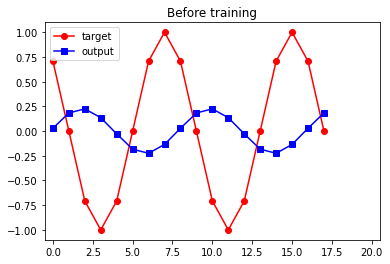

In [28]:
Y_pred = model.predict(X_train[:, :, :])

plt.plot(Y_train, 'ro-', label="target")
plt.plot(Y_pred, 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Before training")
plt.show()

(5) 모델 훈련 (학습) 및 손실함수 확인

In [29]:
print('Training .. ', end='')
history = model.fit(X_train, Y_train, epochs=100, verbose=1)
print('done')

Training .. Epoch 1/100
1/1 [==============================] - 0s 997us/step - loss: 0.6168
Epoch 2/100
1/1 [==============================] - 0s 999us/step - loss: 0.5866
Epoch 3/100
1/1 [==============================] - 0s 999us/step - loss: 0.5581
Epoch 4/100
1/1 [==============================] - 0s 0s/step - loss: 0.5310
Epoch 5/100
1/1 [==============================] - 0s 997us/step - loss: 0.5054
Epoch 6/100
1/1 [==============================] - 0s 998us/step - loss: 0.4810
Epoch 7/100
1/1 [==============================] - 0s 994us/step - loss: 0.4579
Epoch 8/100
1/1 [==============================] - 0s 0s/step - loss: 0.4359
Epoch 9/100
1/1 [==============================] - 0s 998us/step - loss: 0.4149
Epoch 10/100
1/1 [==============================] - 0s 997us/step - loss: 0.3950
Epoch 11/100
1/1 [==============================] - 0s 1ms/step - loss: 0.3760
Epoch 12/100
1/1 [==============================] - 0s 997us/step - loss: 0.3578
Epoch 13/100
1/1 [===============

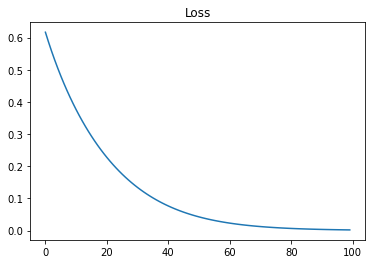

In [30]:
plt.plot(history.history["loss"])
plt.title("Loss")
plt.show()

(6) 학습 후 출력 확인

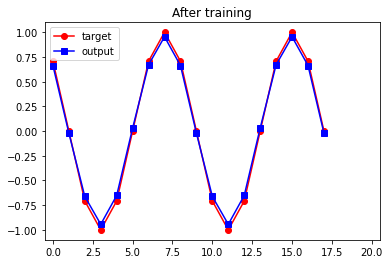

In [31]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model.predict(X_train[:, :, :]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("After training")
plt.show()

# 2. Sequence prediction (Seq-to-seq)

(1) 학습 데이터와 목표값 설정 - 이 번에는 출력값도 길이 3짜리 순서열로

In [32]:
X_train2 = S[:-3, 0:N_timesteps][:, :, np.newaxis]
Y_train2 = S[:-3, N_timesteps:N_timesteps*2][:, :, np.newaxis]
X_train2.shape, Y_train2.shape

((16, 3, 1), (16, 3, 1))

(2) 학습 데이터와 목표 값 확인

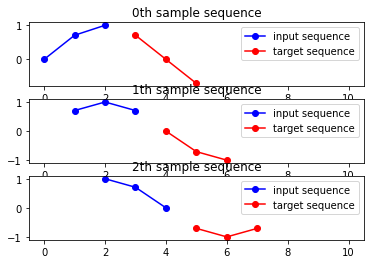

In [33]:
Nplt = 3
for i in range(Nplt):
  plt.subplot(Nplt,1,i+1)
  plt.plot([i,i+1,i+2], X_train2[i].flatten(), 'bo-', label="input sequence")
  plt.plot([i+3, i+4, i+5], Y_train2[i].flatten(), 'ro-', label="target sequence")
  plt.xlim(-0.5, 10.5)
  plt.legend()
  plt.title(str(i) + "th sample sequence")
  plt.grid
  
plt.show()

(3) 모델 생성

In [34]:
from tensorflow.keras.layers import TimeDistributed

model2 = Sequential()
model2.add(SimpleRNN(10, return_sequences=True, input_shape=(N_timesteps, 1)))
model2.add(TimeDistributed(Dense(1, activation="linear")))
model.summary()

model2.compile(loss='mse', optimizer='sgd')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


(5) 모델 훈련 (학습) 및 손실함수 확인

In [35]:
print('Training .. ', end='')
history2 = model2.fit(X_train2, Y_train2, epochs=100, verbose=0)
print('done')

Training .. done


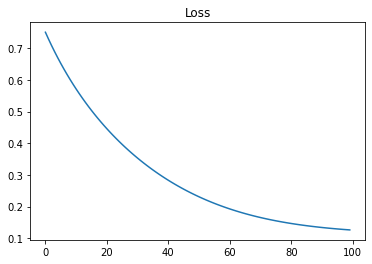

In [36]:
plt.plot(history2.history["loss"])
plt.title("Loss")
plt.show()

(6) 학습 후 출력 확인

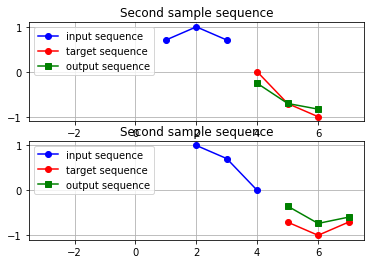

In [37]:
Nplt = 2
for i in range(Nplt):
    plt.subplot(Nplt,1,i+1)
    plt.plot([i+1, i+2, i+3], X_train2[i+1].flatten(), 'bo-', label="input sequence")
    plt.plot([i+4, i+5, i+6], Y_train2[i+1].flatten(), 'ro-', label="target sequence")
    plt.plot([i+4, i+5, i+6], model2.predict(X_train2[(i+1):(i+2), :, :]
                                     ).flatten(), 'gs-', label="output sequence")
    plt.xlim(-3.5, 7.5)
    plt.ylim(-1.1, 1.1)
    plt.legend()
    plt.title("Second sample sequence")
    plt.grid()

plt.show()